In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')
test_data.head()
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [9]:
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


Validation Split : You don't use the test_data file yet. Instead, you take your first file (the one with the Segmentation column) and split it using a tool like train_test_split. This way, you keep a small "hidden" portion of data where you already know the answer to check your accuracy


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [11]:
train_data.drop('ID',axis=1,inplace=True)



In [12]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [15]:
categorical_cols = ['Ever_Married', 'Graduated', 'Profession','Var_1']

for col in categorical_cols:
    # 1. Calculate the mode from the training data
    # .mode() returns a Series, so we take the first element [0]
    col_mode = train_data[col].mode()[0]

    # 2. Fill missing values in the Training set
    train_data[col] = train_data[col].fillna(col_mode)

In [16]:
train_data.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,0
Segmentation,0


In [19]:
numerical_cols = ['Work_Experience', 'Family_Size']

for col in numerical_cols:
    # 1. Calculate the mean from the training data
    col_mean = train_data[col].mean()

    # 2. Fill missing values in the Training set
    train_data[col] = train_data[col].fillna(col_mean)

In [20]:
train_data.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


 EDA

<Axes: xlabel='Age', ylabel='Count'>

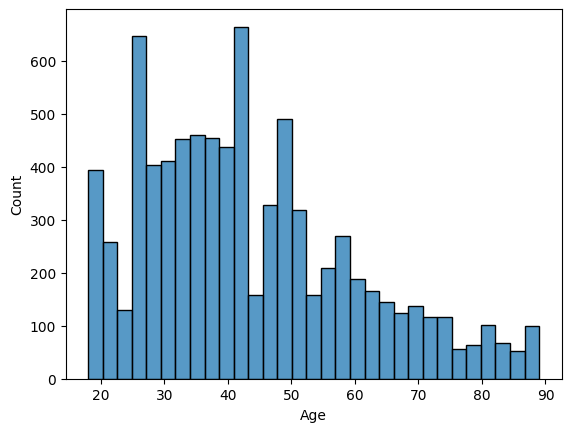

In [35]:
sns.histplot(train_data['Age'])


<Axes: xlabel='Work_Experience', ylabel='Count'>

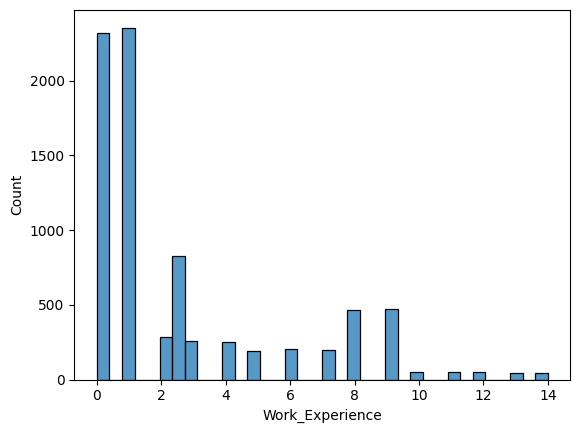

In [36]:
sns.histplot(train_data['Work_Experience'])


<Axes: xlabel='Family_Size', ylabel='Count'>

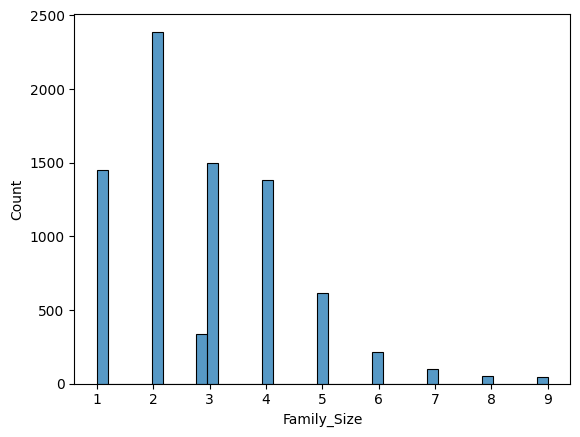

In [37]:

sns.histplot(train_data['Family_Size'])


preprocessing

In [43]:
train_data['Graduated'] = train_data['Graduated'].map({'Yes': 1, 'No': 0})
train_data['Ever_Married'] = train_data['Ever_Married'].map({'Yes': 1, 'No': 0})

In [44]:
train_data['Gender'] =train_data['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
categorical_cols_non_ordinal = ['Profession', 'Var_1']

train_data= pd.get_dummies(train_data, columns=categorical_cols_non_ordinal, drop_first=True)

In [48]:
train_data['Spending_Score'].value_counts()

,count
Spending_Score,
Low,4878
Average,1974
High,1216


In [49]:
train_data['Spending_Score'] = train_data['Spending_Score'].map({
    'Low': 0,
    'Average': 1,
    'High': 2
})

In [50]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,0,22,0,1.000000,0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,1,1,38,1,2.641663,1,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,1,1,67,1,1.000000,0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,0,1,67,1,0.000000,2,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,1,1,40,1,2.641663,2,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [52]:
# Find boolean columns
bool_cols = train_data.select_dtypes(include='bool').columns
train_data[bool_cols] = train_data[bool_cols].astype(int)


In [53]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,0,22,0,1.000000,0,4.0,D,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,38,1,2.641663,1,3.0,A,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,67,1,1.000000,0,1.0,B,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,67,1,0.000000,2,2.0,B,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,1,40,1,2.641663,2,6.0,A,0,0,...,0,0,0,0,0,0,0,0,1,0


the order doesn’t matter (for the target)for softmax

Softmax + Logistic Regression works by predicting probabilities for each class independently:

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['Segmentation'] = le.fit_transform(train_data['Segmentation'])  # Replace 'target' with your column name

# Check mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3)}


In [55]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,0,22,0,1.000000,0,4.0,3,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,38,1,2.641663,1,3.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,67,1,1.000000,0,1.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,67,1,0.000000,2,2.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,1,40,1,2.641663,2,6.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
y = train_data['Segmentation']
X = train_data.drop(columns=['Segmentation'])

In [58]:
print(X)
print(y)

      Gender  Ever_Married  Age  Graduated  Work_Experience  Spending_Score  \
0          0             0   22          0         1.000000               0   
1          1             1   38          1         2.641663               1   
2          1             1   67          1         1.000000               0   
3          0             1   67          1         0.000000               2   
4          1             1   40          1         2.641663               2   
...      ...           ...  ...        ...              ...             ...   
8063       0             0   22          0         0.000000               0   
8064       0             0   35          0         3.000000               0   
8065       1             0   33          1         1.000000               0   
8066       1             0   27          1         1.000000               0   
8067       0             1   37          1         0.000000               1   

      Family_Size  Profession_Doctor  Profession_En

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test
    stratify=y,         # preserve class distribution
    random_state=42
)

In [61]:
softmax_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

softmax_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [65]:
yy= softmax_model.predict(X_train)
acc = accuracy_score(y_train, yy)
print(acc)

0.510226216299969


In [62]:
y_pred = softmax_model.predict(X_test)
y_proba = softmax_model.predict_proba(X_test)

In [63]:
print("Predicted classes:", y_pred[:5])
print("Predicted probabilities (softmax):\n", np.round(y_proba[:5], 3))

Predicted classes: [0 3 0 3 3]
Predicted probabilities (softmax):
 [[0.486 0.143 0.034 0.338]
 [0.053 0.032 0.038 0.877]
 [0.342 0.263 0.22  0.175]
 [0.366 0.143 0.035 0.456]
 [0.048 0.052 0.098 0.802]]


In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.3f}")


Accuracy: 0.513
